In [1]:
# Paso 1: Instalación de dependencias (ejecutar en Jupyter Notebook si es necesario)
!pip install pandas matplotlib seaborn scikit-learn

In [2]:
# Paso 2: Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# Paso 3: Cargar el conjunto de datos
# Reemplazar 'ruta_del_archivo' por el nombre del archivo cargado
ruta_del_archivo = 'Titanic-Dataset.csv'
df = pd.read_csv(ruta_del_archivo)

Primeras filas del conjunto de datos:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Resumen de las columnas y los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Estadísticas descriptivas:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


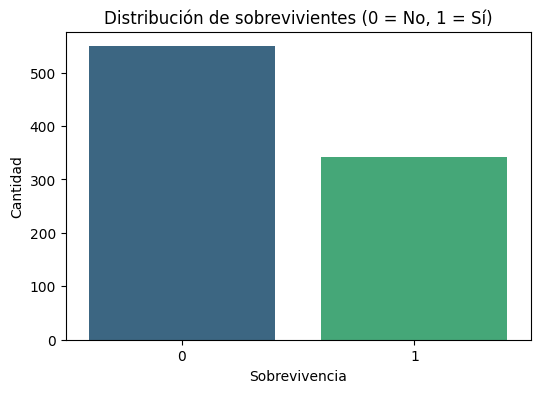

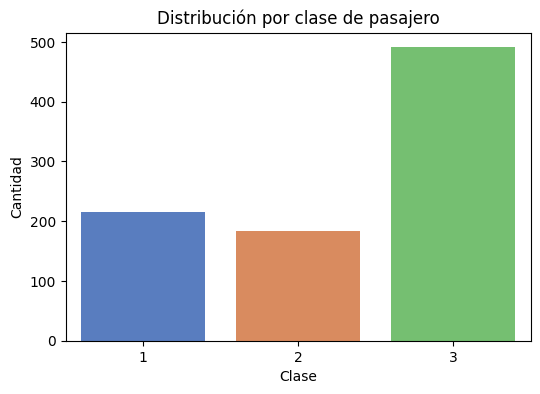

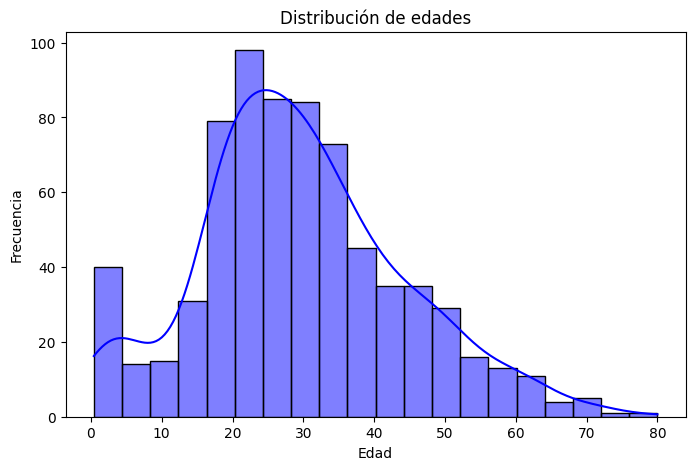

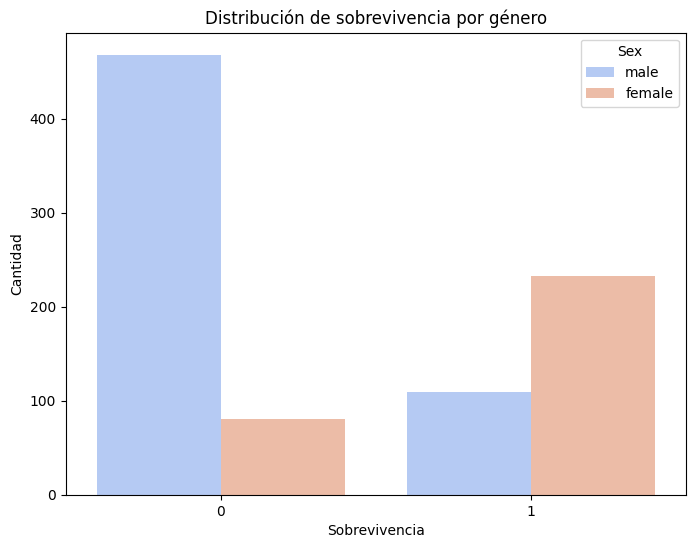

In [7]:
# Paso 4: Vista inicial del dataset
print("Primeras filas del conjunto de datos:")
display(df.head())

# Paso 5: Resumen general del dataset
print("\nResumen de las columnas y los datos:")
df.info()

# Paso 6: Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())

# Paso 7: Análisis gráfico inicial de las distribuciones
# Gráfico de sobrevivientes
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived', hue='Survived', dodge=False, palette='viridis')
plt.title('Distribución de sobrevivientes (0 = No, 1 = Sí)')
plt.xlabel('Sobrevivencia')
plt.ylabel('Cantidad')
plt.legend([],[], frameon=False)
plt.show()

# Gráfico de clases de pasajero
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Pclass', dodge=False, palette='muted')
plt.title('Distribución por clase de pasajero')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.legend([],[], frameon=False)
plt.show()

# Gráfico de edades
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de género y sobrevivencia
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Sex', data=df, palette='coolwarm')
plt.title('Distribución de sobrevivencia por género')
plt.xlabel('Sobrevivencia')
plt.ylabel('Cantidad')
plt.show()

In [10]:
# Paso 2: Preprocesamiento de datos (con verificación de columnas)

# 1. Eliminar columnas irrelevantes (verificamos si existen antes de intentar eliminarlas)
columnas_a_eliminar = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns])

# 2. Tratamiento de valores faltantes
# a. Edad (Age): Rellenamos los valores faltantes con la mediana
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

# b. Puerto de embarque (Embarked): Rellenamos los valores faltantes con la moda
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Codificación de variables categóricas
# Convertimos 'Sex' y 'Embarked' en variables numéricas usando Label Encoding
if 'Sex' in df.columns:
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])  # male=1, female=0
if 'Embarked' in df.columns:
    df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # S=2, C=0, Q=1

# 4. Escalado de características
# Estandarizamos 'Age' y 'Fare' para que tengan una escala similar
caracteristicas_a_escalar = ['Age', 'Fare']
columnas_disponibles = [col for col in caracteristicas_a_escalar if col in df.columns]
scaler = StandardScaler()
df[columnas_disponibles] = scaler.fit_transform(df[columnas_disponibles])

# Verificamos el dataset preprocesado
print("\nDataset después del preprocesamiento:")
display(df.head())
print("\nResumen de los datos preprocesados:")
df.info()



Dataset después del preprocesamiento:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2



Resumen de los datos preprocesados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


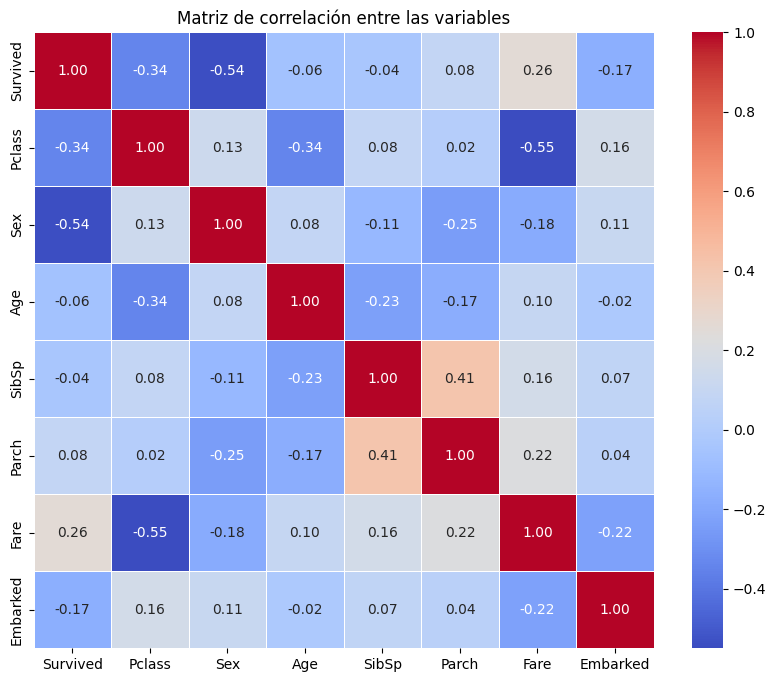


Puntajes de importancia de las características:


,Característica,Puntaje
1,Sex,372.405724
0,Pclass,115.031272
5,Fare,63.030764
6,Embarked,25.717286
4,Parch,5.963464
2,Age,3.761528
3,SibSp,1.110572



Características seleccionadas para el modelo: ['Sex', 'Pclass', 'Fare', 'Embarked', 'Parch']


In [11]:
# Paso 3: Selección de características

# 1. Matriz de correlación para analizar relaciones entre las variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre las variables')
plt.show()

# 2. Análisis univariante: Selección de características con SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

# Separar características y variable objetivo
X = df.drop(columns=['Survived'])
y = df['Survived']  

# Seleccionar las 5 características más importantes
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Mostrar puntajes de cada característica
scores = pd.DataFrame({'Característica': X.columns, 'Puntaje': selector.scores_})
scores = scores.sort_values(by='Puntaje', ascending=False)
print("\nPuntajes de importancia de las características:")
display(scores)

# Selección final de características más importantes
mejores_caracteristicas = scores['Característica'].head(5).tolist()
print("\nCaracterísticas seleccionadas para el modelo:", mejores_caracteristicas)

In [12]:
# Paso 4: Dividir el dataset en conjuntos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

# Selección de las características más importantes
caracteristicas_seleccionadas = ['Sex', 'Pclass', 'Fare', 'Embarked', 'Parch']
X = df[caracteristicas_seleccionadas]
y = df['Survived']        

# División de los datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar la forma de los conjuntos de datos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 712 muestras
Tamaño del conjunto de prueba: 179 muestras


In [13]:
# Paso 5: Entrenar el modelo de regresión logística

from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo de regresión logística
modelo = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de entrenamiento
accuracy_train = modelo.score(X_train, y_train)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_train:.2f}")

Precisión del modelo en el conjunto de entrenamiento: 0.79


In [14]:
# Paso 6: Evaluar el desempeño del modelo

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Precisión en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy_test:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo en el conjunto de prueba: 0.78

Matriz de confusión:
[[91 19]
 [21 48]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.72      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



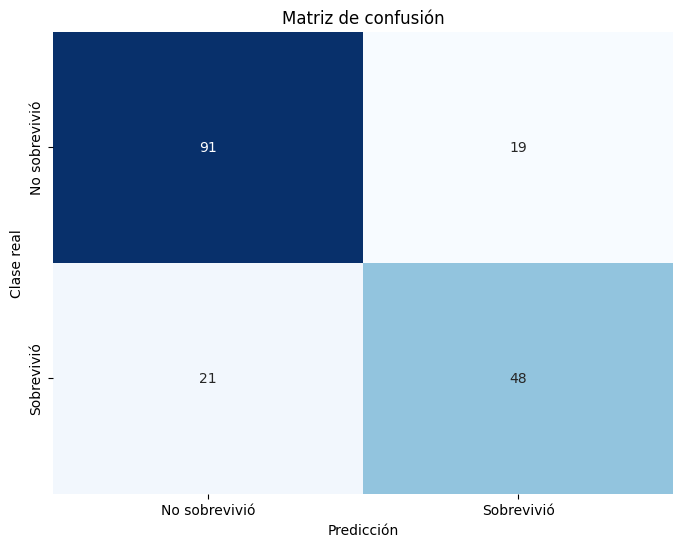

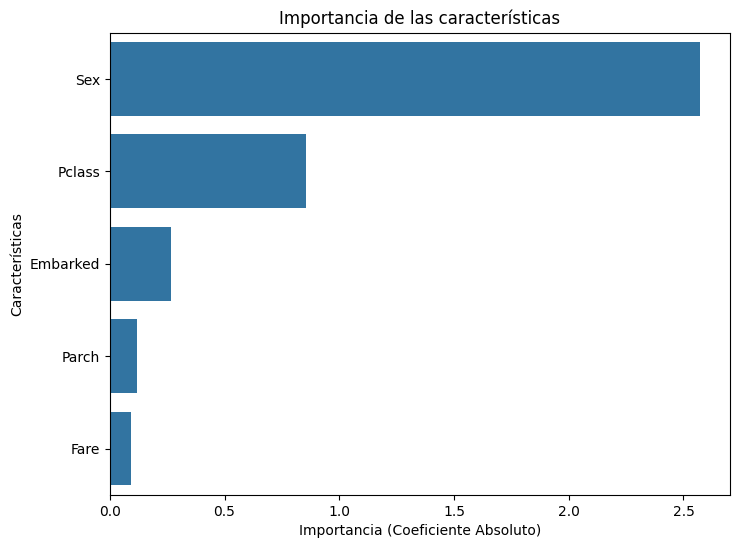

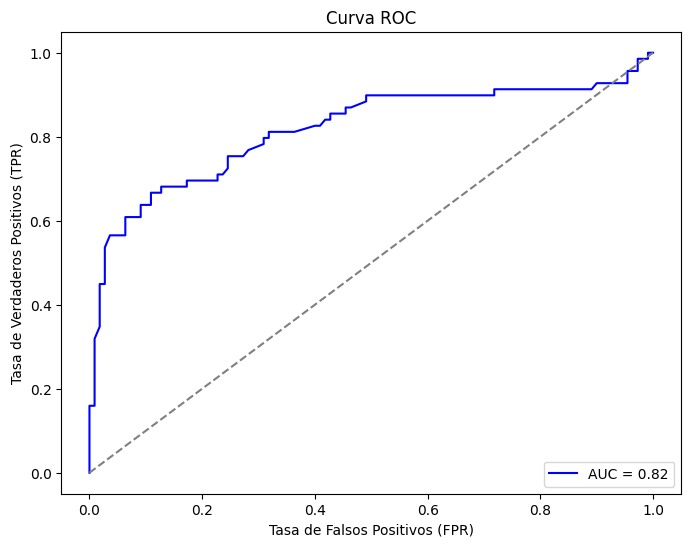

In [18]:
# Paso 7: Visualización de resultados

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# 1. Matriz de confusión visual
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Clase real')
plt.xticks(ticks=[0.5, 1.5], labels=['No sobrevivió', 'Sobrevivió'])
plt.yticks(ticks=[0.5, 1.5], labels=['No sobrevivió', 'Sobrevivió'])
plt.show()

# 2. Importancia de las características
# Extraemos coeficientes del modelo para las características seleccionadas
importancia = pd.DataFrame({
    'Característica': caracteristicas_seleccionadas,
    'Importancia': abs(modelo.coef_[0])
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=importancia, x='Importancia', y='Característica', orient='h')
plt.title('Importancia de las características')
plt.xlabel('Importancia (Coeficiente Absoluto)')
plt.ylabel('Características')
plt.show()

# 3. Curva ROC y AUC
# Calcular probabilidades predichas
y_pred_prob = modelo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.show()
